# Project Presentation

## Title: Unveiling Bias in Film Ratings: A Data Analysis Perspective

In the realm of deciding which movie to watch, the reliability of online reviews and ratings often comes into question. Particularly intriguing is the scenario where the entity providing the rating also profits from ticket sales. This raises a crucial question: Does the company tend to overrate movies to boost ticket sales?



### Data

These are the data behind the story in the article "Be Suspicious Of Online Movie Ratings," specifically from Fandango and publicly available on: https://github.com/fivethirtyeight/data.

There are two CSV files, one containing the Stars and Ratings displayed on Fandango, and the other with aggregated data for movie ratings from other sites like Metacritic, IMDB, and Rotten Tomatoes.

---

#### all_sites_scores.csv

`all_sites_scores.csv` contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

---

#### fandango_scape.csv

`fandango_scrape.csv` contient tous les films de l'article 538 tirés de Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Exploration of Fandango Ratings versus Real User Reviews

In [37]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)

In [38]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [39]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [40]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Exploration of the Relationship Between Film Popularity and Ratings.**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

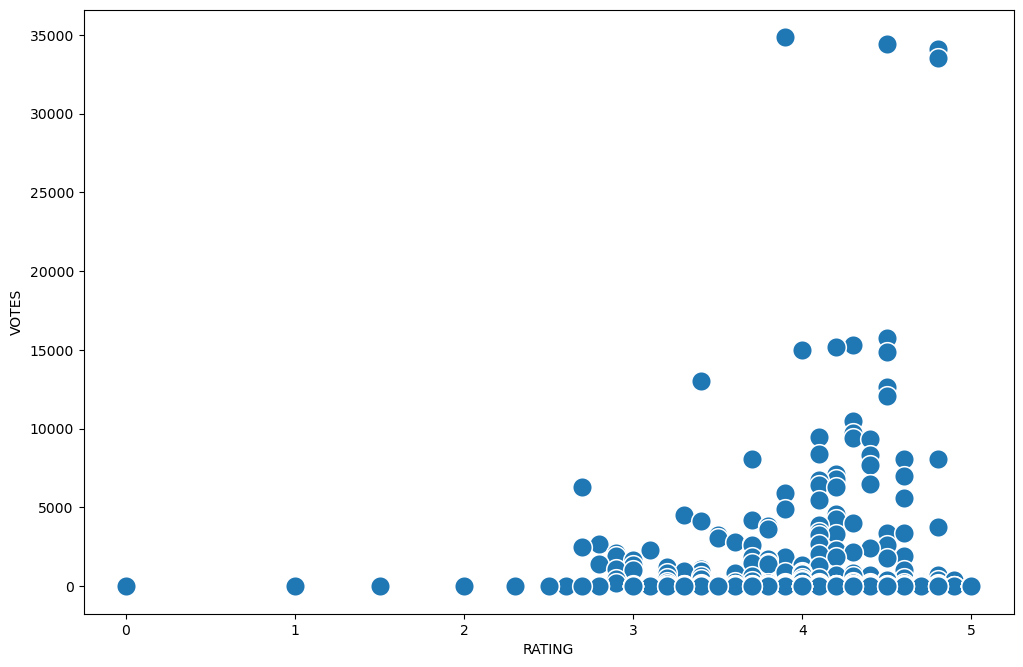

In [41]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='RATING',y='VOTES',data=fandango, s=200)

In [42]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [43]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [44]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

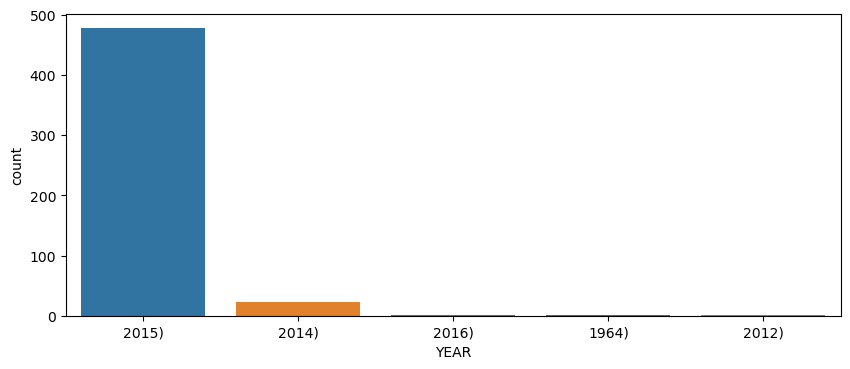

In [45]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(x='YEAR',data=fandango);

**What are the top 10 movies with the highest number of votes?**

In [46]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**How many movies have no reviews/votes?**

In [93]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

In [48]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [49]:
fan_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


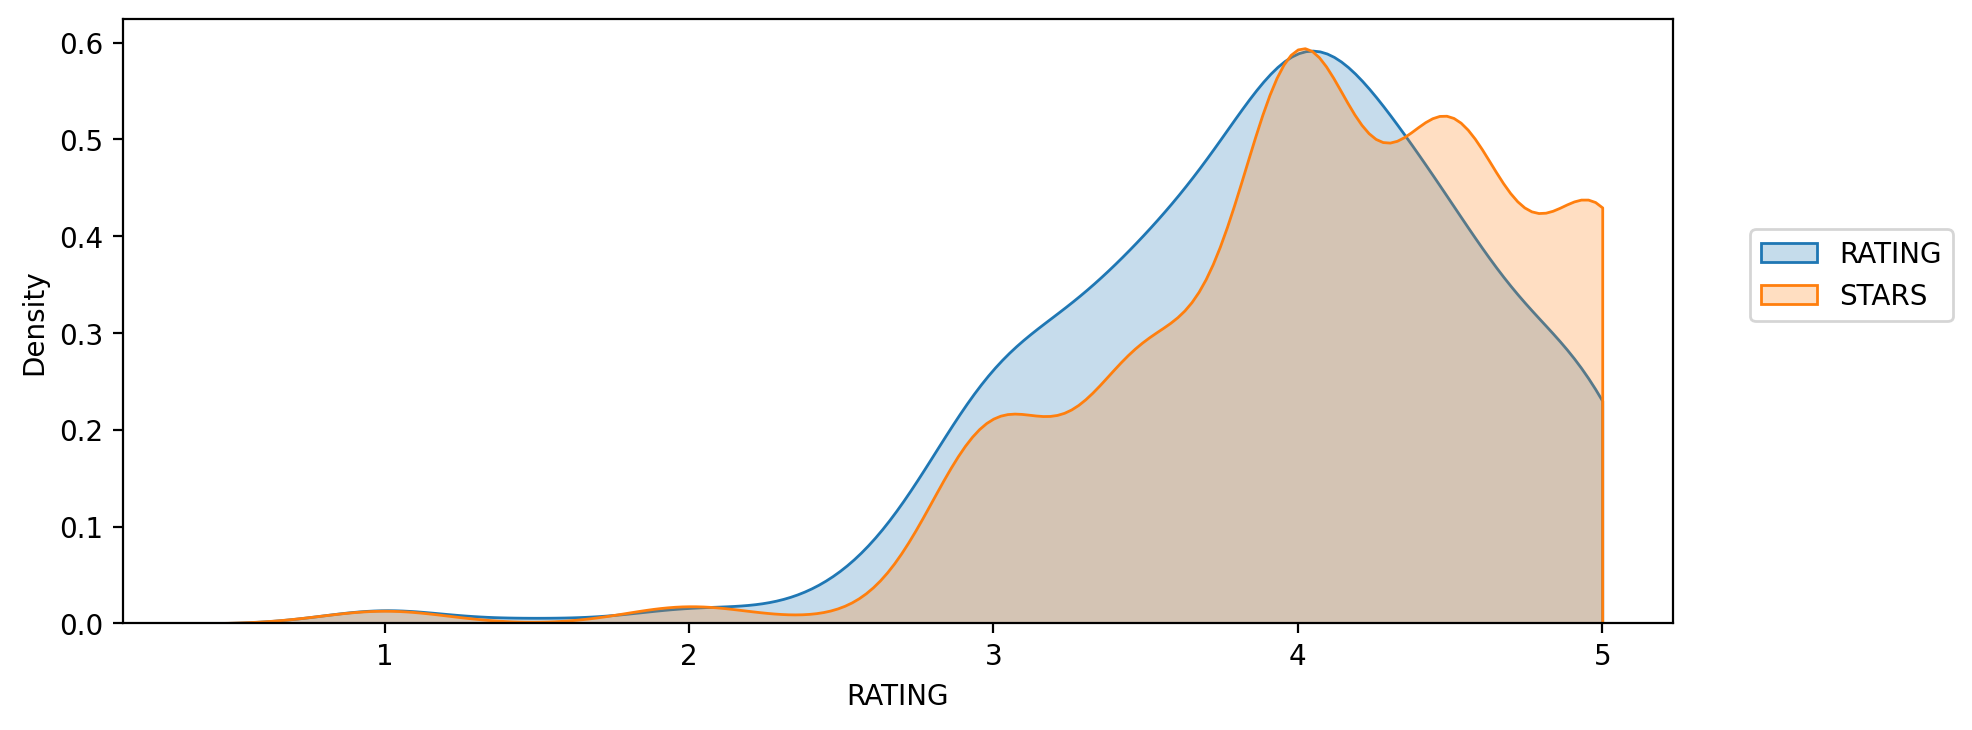

In [94]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label="RATING")
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label="STARS")

plt.legend(loc=(1.05,0.5));

In [51]:
fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(1)

C:\Users\TOUTA\AppData\Local\Temp/ipykernel_14396/1255023994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF']=fan_reviewed['STARS']-fan_reviewed['RATING']
C:\Users\TOUTA\AppData\Local\Temp/ipykernel_14396/1255023994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(1)


In [52]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


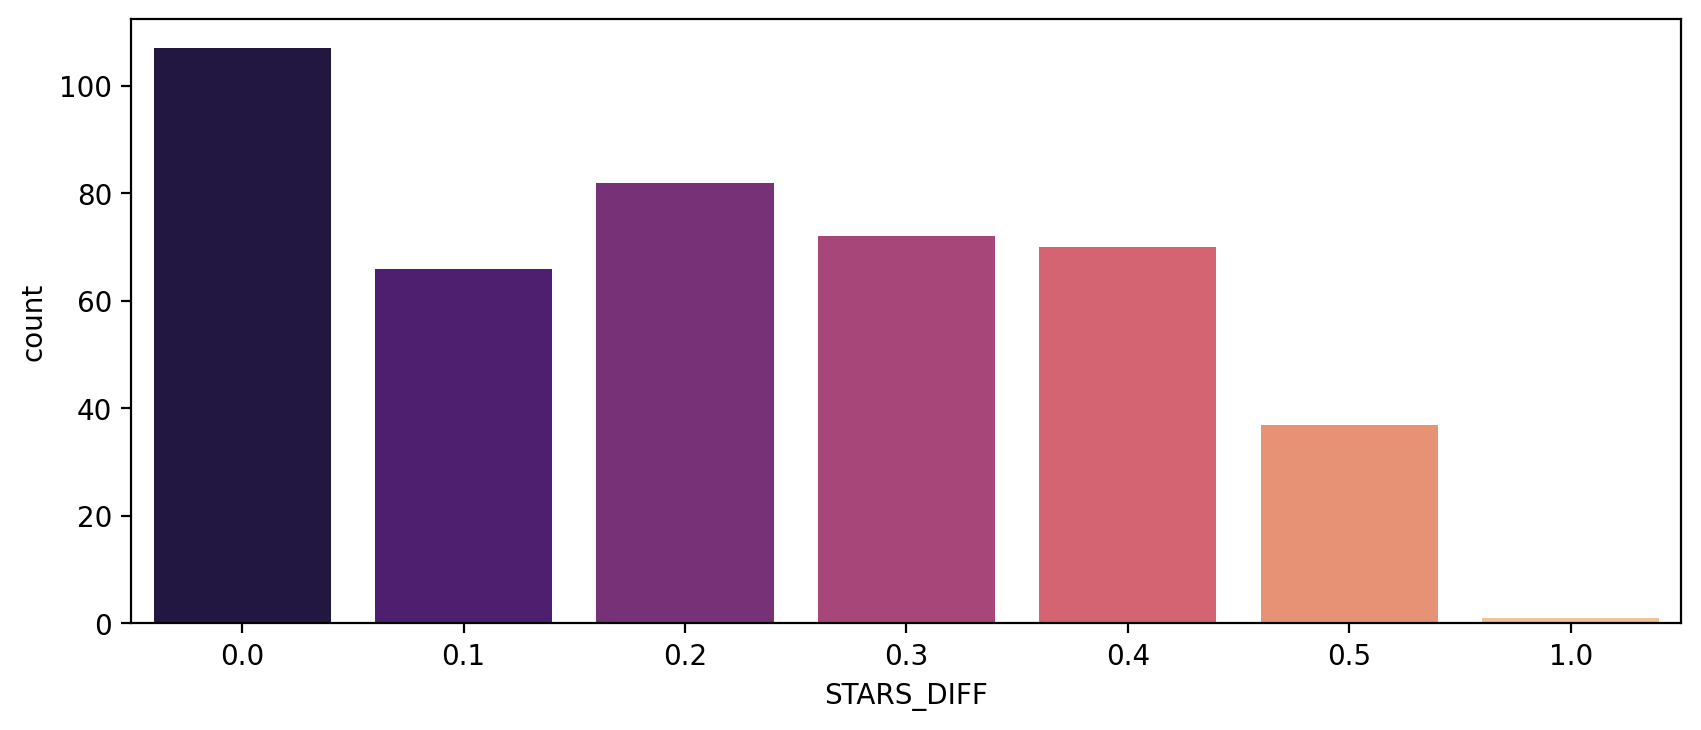

In [53]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='STARS_DIFF',data=fan_reviewed,palette='magma');

**We can observe from the previous plot that one movie displayed a difference of one star from its actual rating! Which movie had this close-to-one-star differential?**

In [54]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## Comparison of Fandango Ratings with Other Platforms

In [55]:
 # Lecture du fichier all_sites_scores.csv dans le dataframe all_sites
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

In [56]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [57]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [58]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


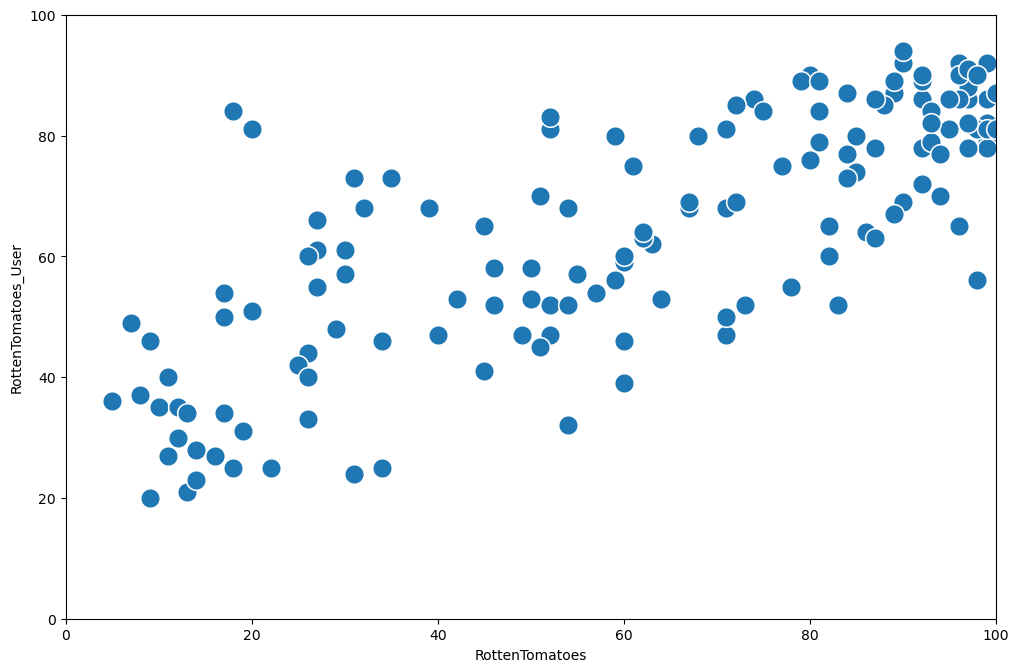

In [59]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites, s=200)
plt.xlim(0,100)
plt.ylim(0,100);

In [60]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [61]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

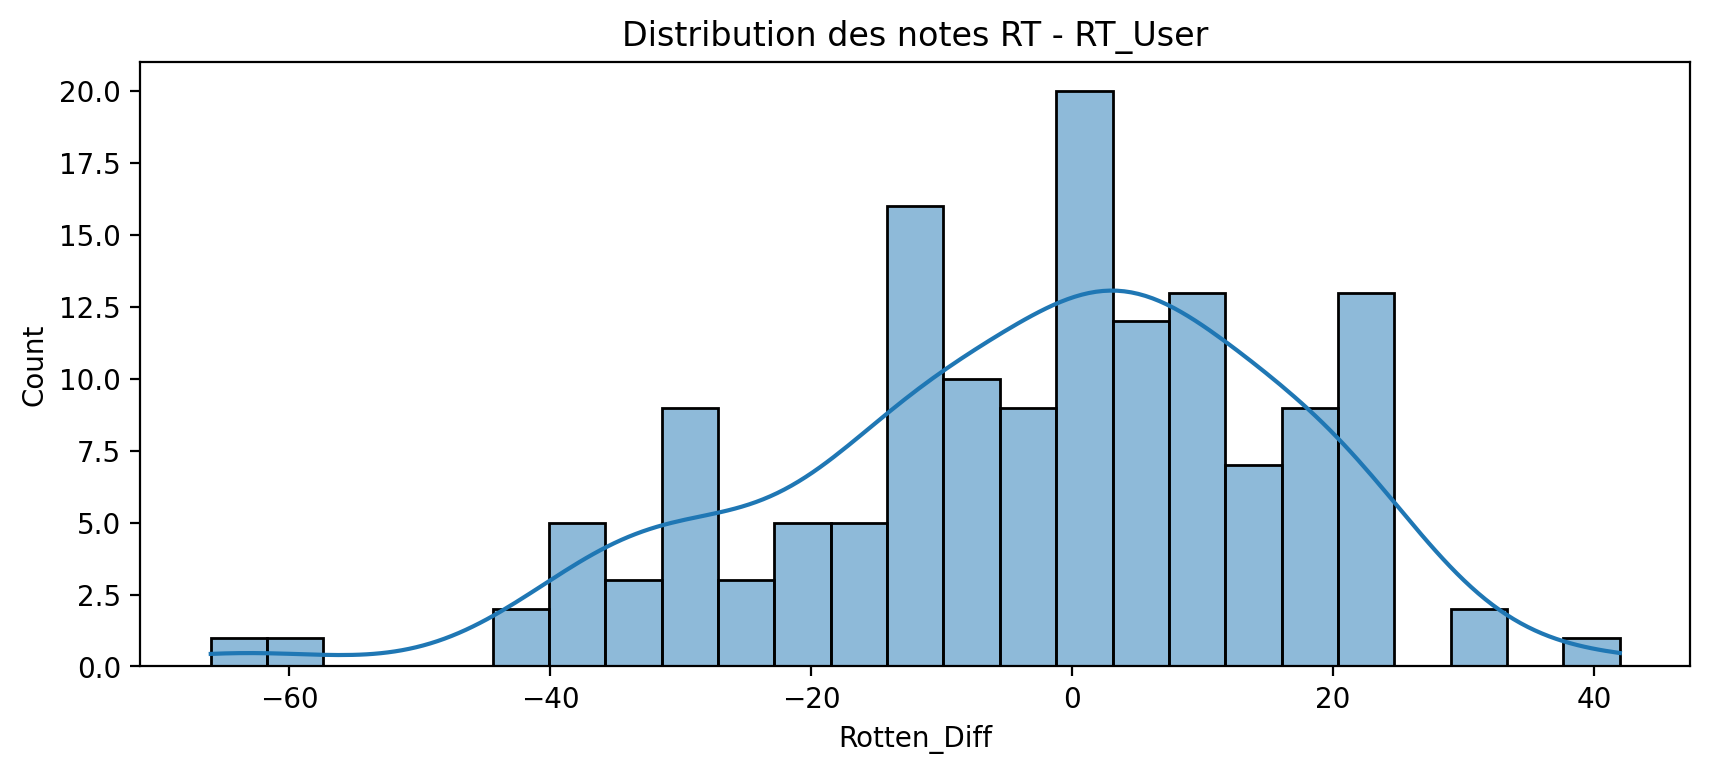

In [62]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("Distribution des notes RT - RT_User");

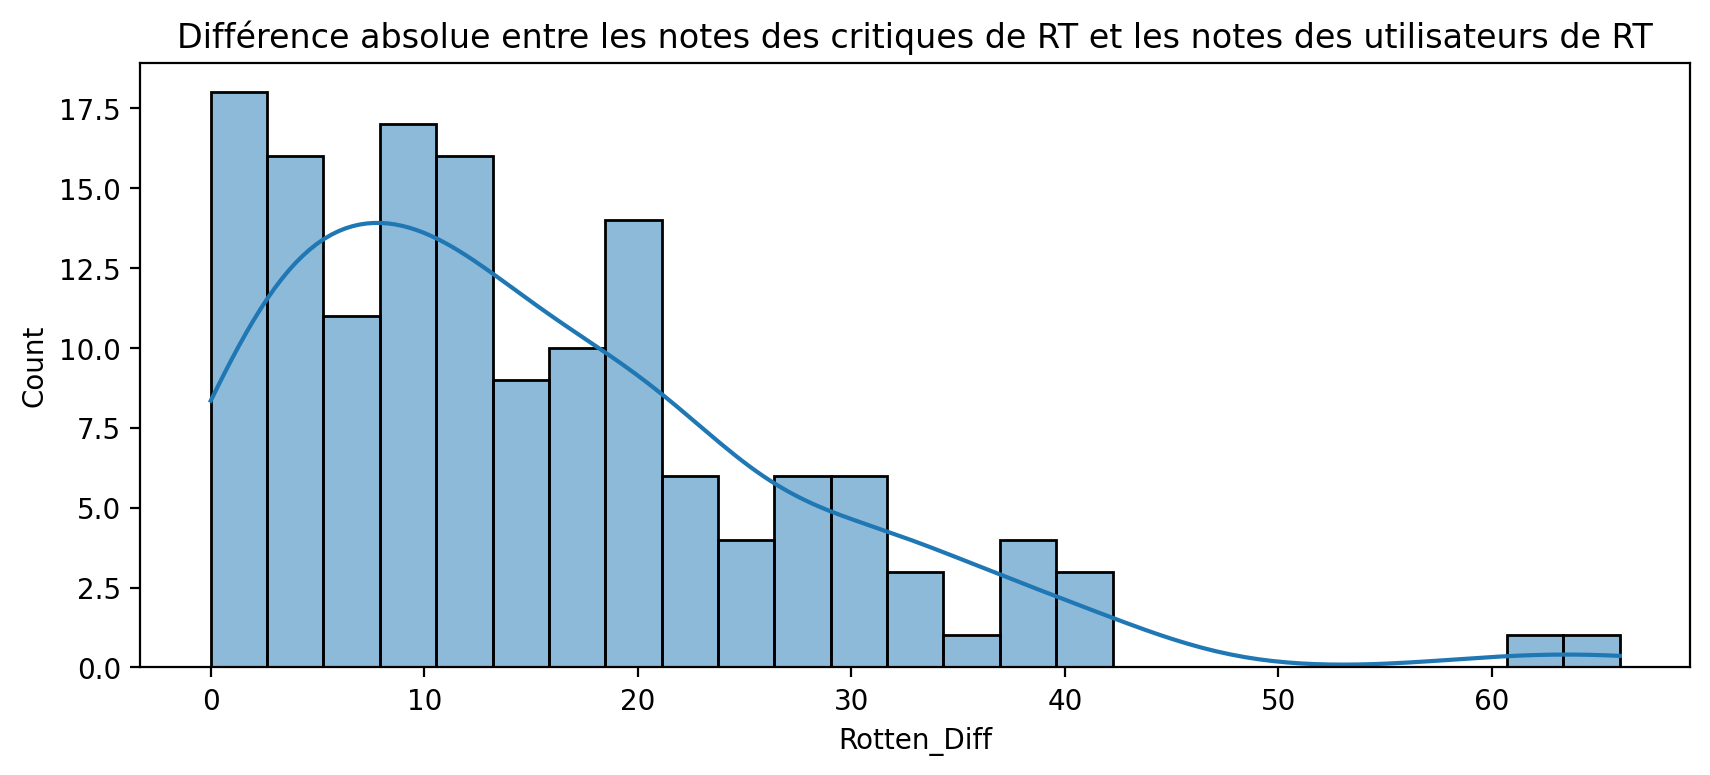

In [63]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Différence absolue entre les notes des critiques de RT et les notes des utilisateurs de RT");

**TWhat are the top 5 movies that have received a user average rating higher than that of the critics:**

In [95]:
print("Users love it but reviewers hate it")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users love it but reviewers hate it


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [96]:
print("Reviewers love it, but users hate it")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Reviewers love it, but users hate it


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

Now let's look at the MetaCritic ratings. MetaCritic also displays an average user rating compared to their official posted rating.

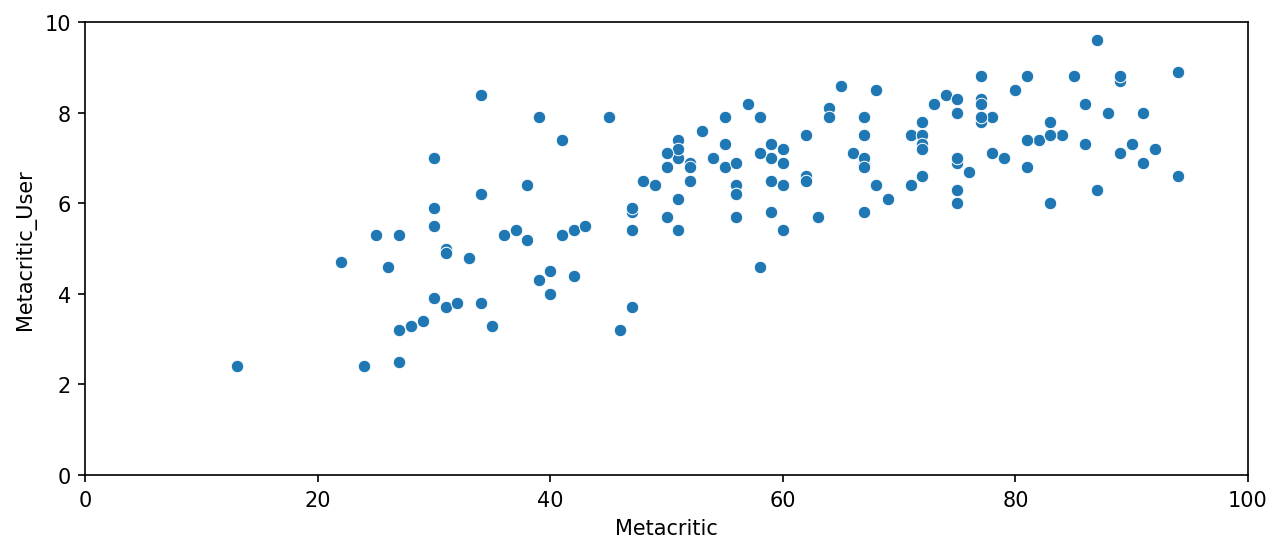

In [66]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

### IMDb

Finally, let's explore IMDb. Note that Metacritic and IMDb offer vote counts. Let's analyze the most popular films.




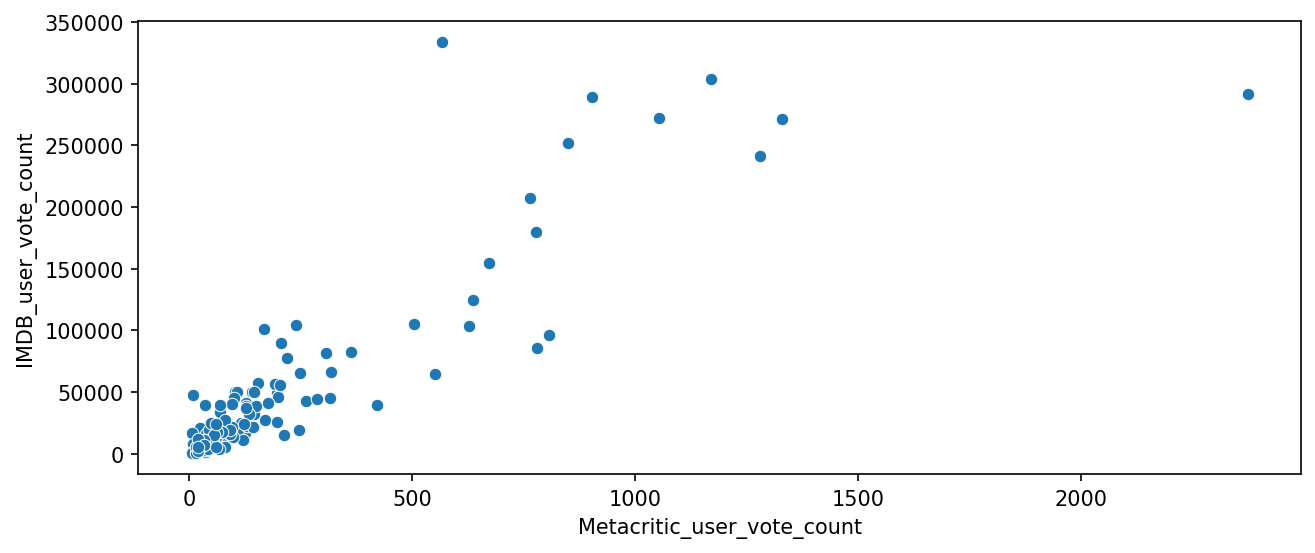

In [67]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

In [68]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [69]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


### Fandago vs. Other Platforms

Finally, let's begin to examine whether Fandango artificially posts higher ratings than other movie review sites to increase ticket sales.

In [70]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [72]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


In [73]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [74]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [75]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [76]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [77]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [78]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparison of score distribution between sites


Now is the moment of truth! Is Fandango showing abnormally high ratings? We already know that Fandango has a higher STARS rating than the actual RATING rating, but are the ratings themselves higher than the average of all movie rating and review platforms?


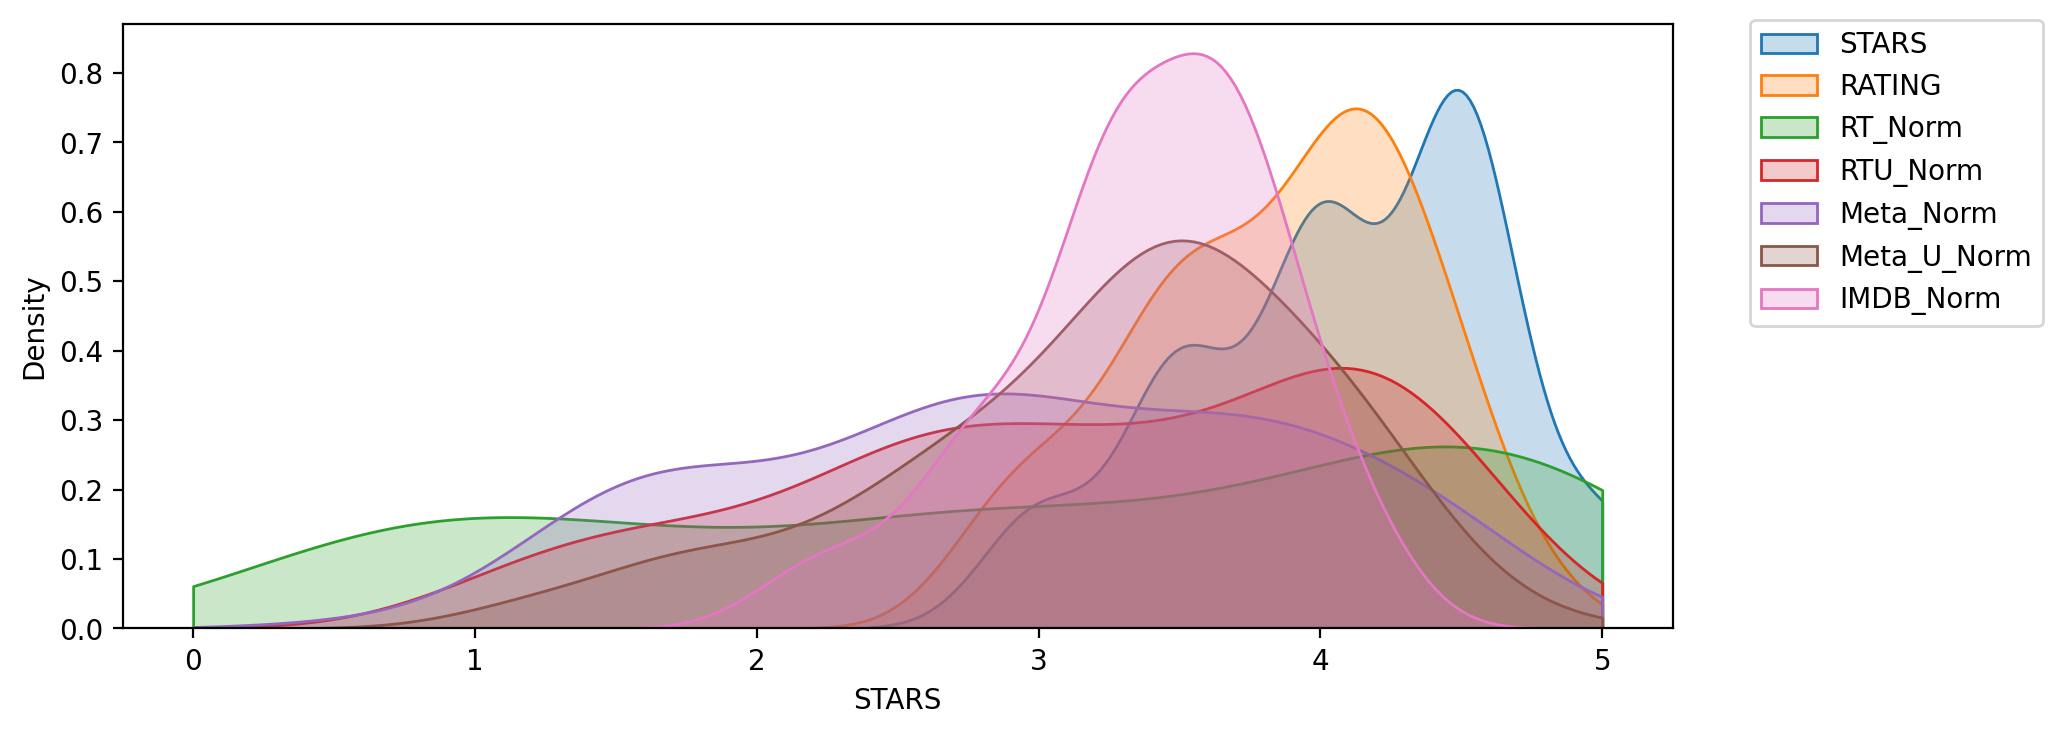

In [82]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores,x='STARS',clip=[0,5],fill=True,label="STARS")
sns.kdeplot(data=norm_scores,x='RATING',clip=[0,5],fill=True,label="RATING")
sns.kdeplot(data=norm_scores,x='RT_Norm',clip=[0,5],fill=True,label="RT_Norm")
sns.kdeplot(data=norm_scores,x='RTU_Norm',clip=[0,5],fill=True,label="RTU_Norm")
sns.kdeplot(data=norm_scores,x='Meta_Norm',clip=[0,5],fill=True,label="Meta_Norm")
sns.kdeplot(data=norm_scores,x='Meta_U_Norm',clip=[0,5],fill=True,label="Meta_U_Norm")
sns.kdeplot(data=norm_scores,x='IMDB_Norm',clip=[0,5],fill=True,label="IMDB_Norm")
plt.legend(loc=(1.05,0.5));

**It's clear that Fandango's distribution is uneven. We can also see that RT reviews have the most even distribution. Let's directly compare these two.

Create a KDE chart that compares the distribution of RT review scores with the STARS displayed by Fandango.**

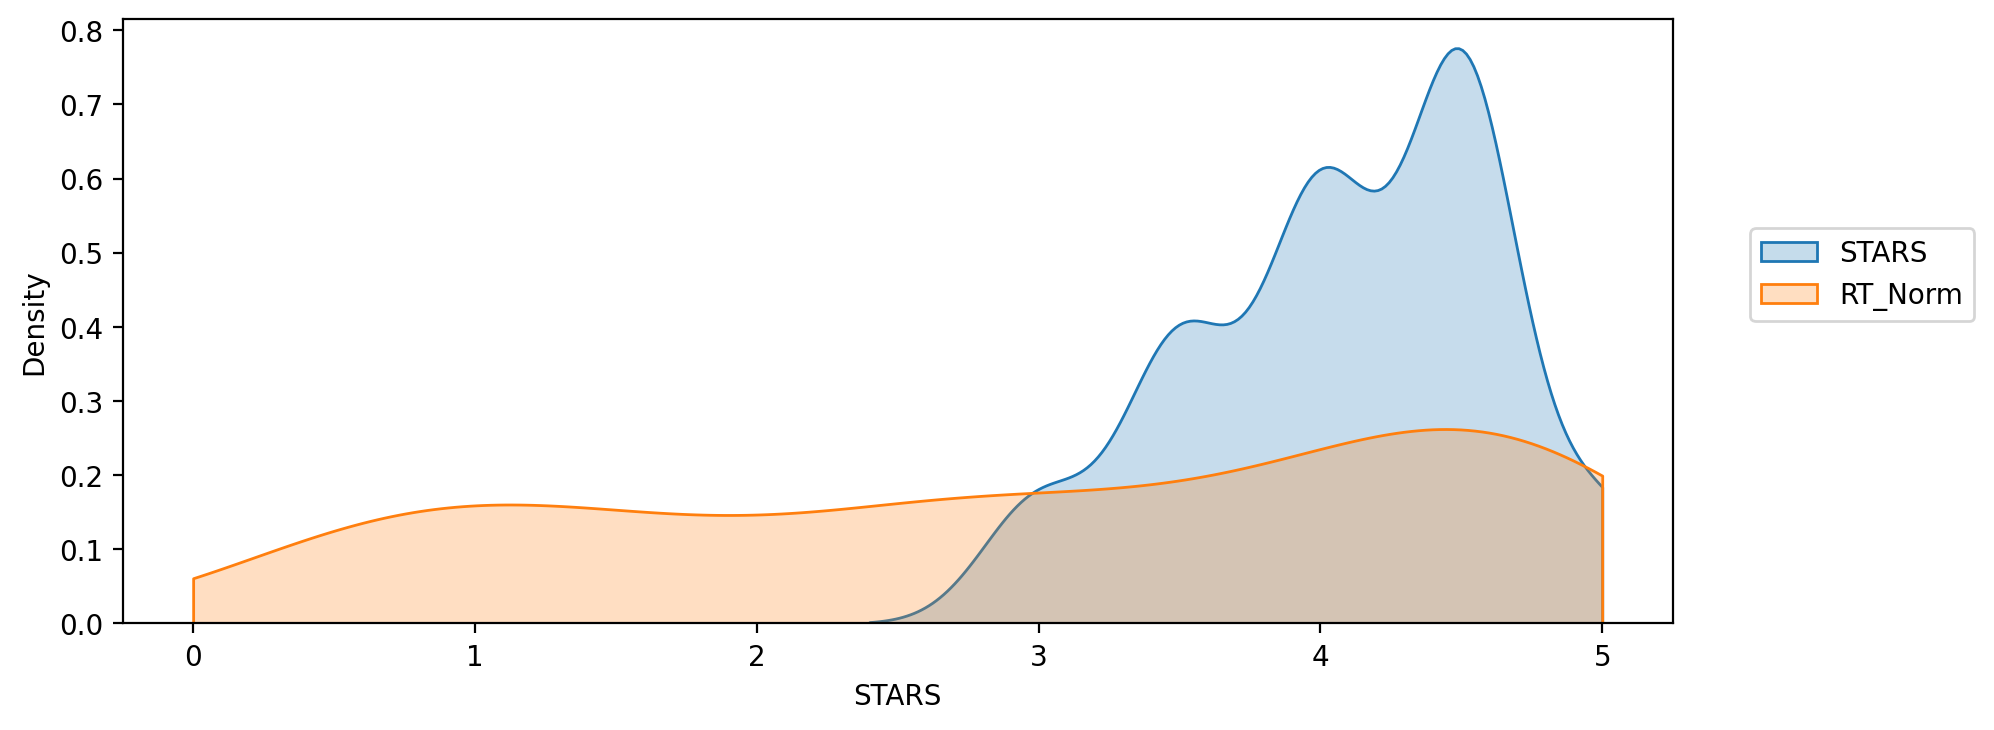

In [83]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scores,x='STARS',clip=[0,5],fill=True,label="STARS")
sns.kdeplot(data=norm_scores,x='RT_Norm',clip=[0,5],fill=True,label="RT_Norm")
plt.legend(loc=(1.05,0.5));

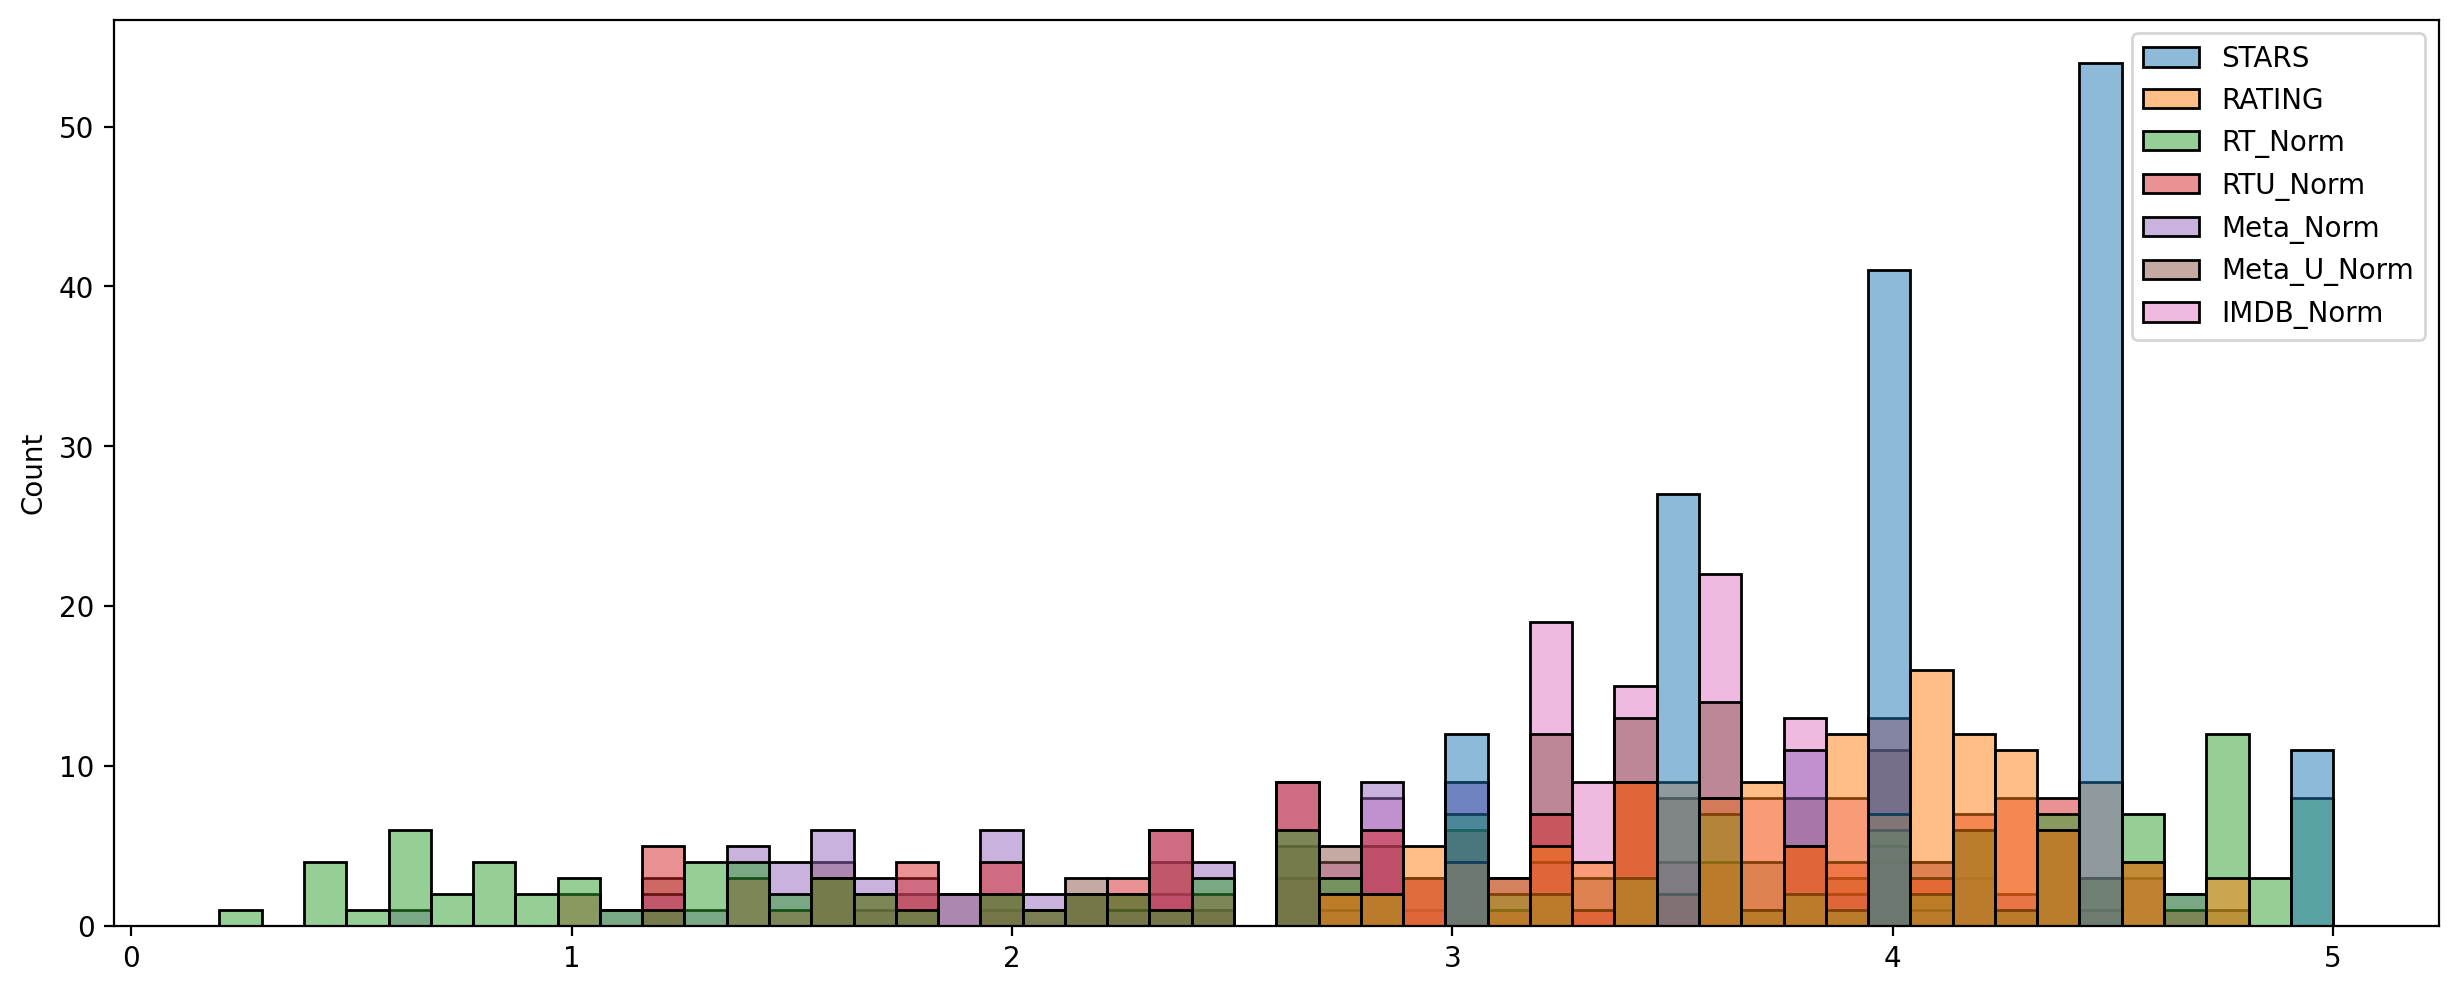

In [84]:
plt.subplots(figsize=(15,6),dpi=200)
sns.histplot(norm_scores,bins=50);

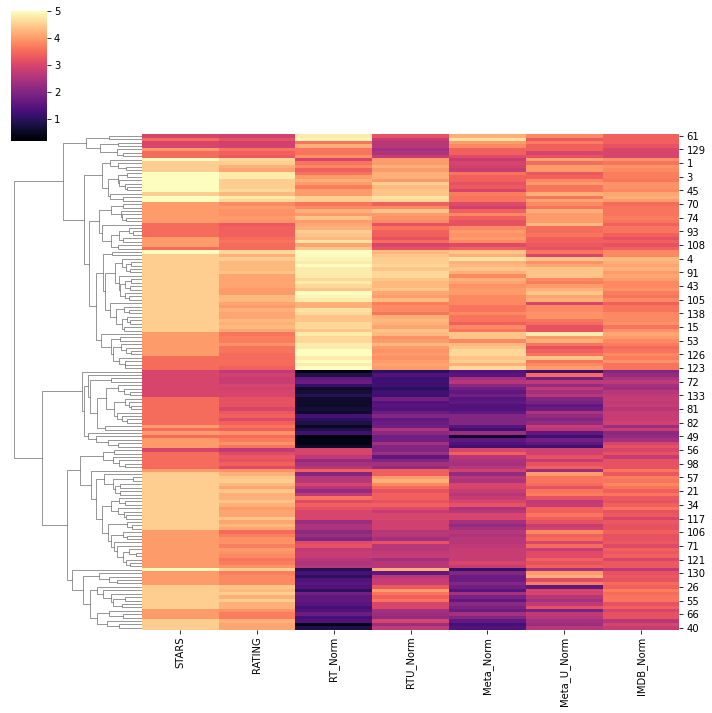

In [85]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False);

**It's clear that Fandango rates movies much more generously than other platforms, especially considering that it then displays a rounded version of its rating. Let's take a look at the top 10 worst movies. Based on Rotten Tomatoes critic ratings, what are the 10 lowest rated movies? What are the normalized scores across all platforms for these films? You may need to add the MOVIE column to your Normalized Scores DataFrame to see the results.**

In [86]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [87]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


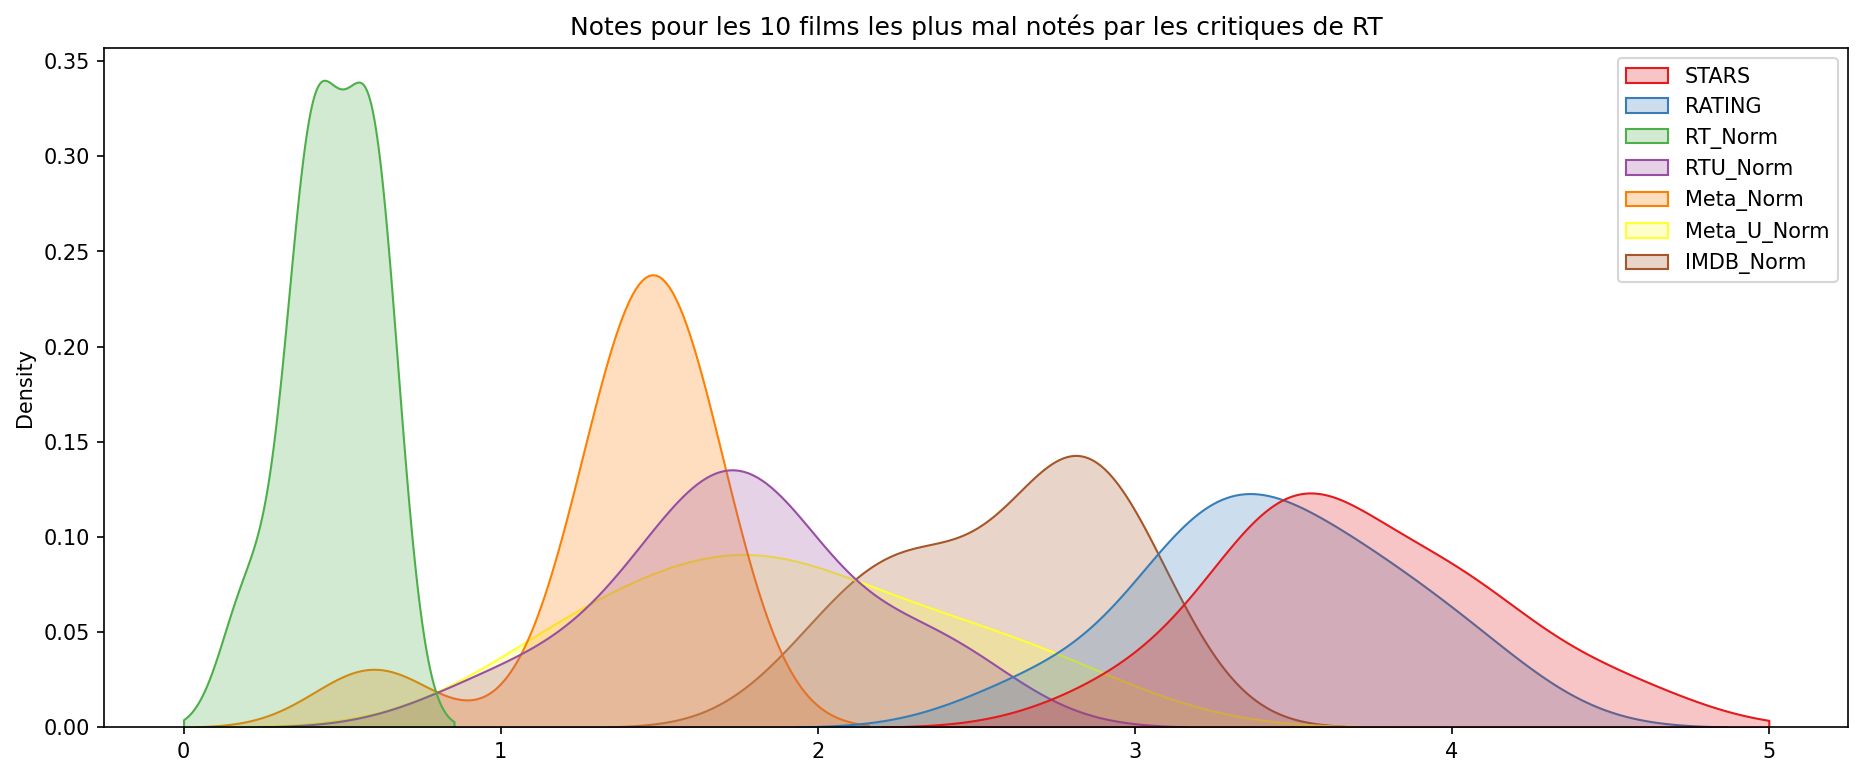

In [88]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Notes pour les 10 films les plus mal notés par les critiques de RT");

---
---
<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final Thoughts : Wow! Fandango gives around 3 to 4 stars for clearly bad films! Notice the biggest crook : [Taken 3 !](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango displays 4.5 stars on its site for a film with [note moyenne de 1,86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) on other platforms !**

In [97]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [98]:
0.4+2.3+1.3+2.3+3

9.3

In [99]:
9.3/5

1.86